
# Análise dos Dados do Airbnb - Paris / França

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, França, e ver quais insights podem ser extraídos a partir de dados brutos.**

# **Importando as bibliotecas**

Primeiro vamos importar as bibliotecas necessárias para o nosso projeto. Vamos usar o pandas para as manipulações de dados e as bibliotecas Matplotlib e seaborn para a visualização dos dados.

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## **Importando os dados**

In [29]:
# importar o arquivo listings.csv para um DataFrame
caminho_do_arquivo = '/content/dadosParis.csv'
df = pd.read_csv(caminho_do_arquivo)

### Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 10 primeiras entradas.

In [30]:
# mostrar as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1800877,Condo in Paris · ★4.55 · 1 bedroom · 1 bed · 1...,6069249,Stéphane,NaN,Buttes-Chaumont,48.890460,2.375670,Private room,35,60,56,2023-04-07,0.51,5,157,2,NaN
1,745443456858903167,Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...,178498908,François,NaN,Hôtel-de-Ville,48.850571,2.362530,Entire home/apt,130,4,5,2023-05-01,0.68,1,11,5,7510407484219
2,22687665,Rental unit in Paris · ★4.71 · 1 bedroom · 2 b...,167168801,Hélène,NaN,Buttes-Chaumont,48.883470,2.379940,Entire home/apt,45,1,17,2018-06-11,0.26,1,0,0,7511901339746
3,25037271,Rental unit in Paris · ★4.96 · 1 bedroom · 2 b...,189282115,Yannick,NaN,Buttes-Chaumont,48.885021,2.380398,Entire home/apt,150,5,115,2023-06-04,1.94,1,0,25,7511902175035
4,27106295,Rental unit in Paris · 1 bedroom · 1 bed · 1 p...,186309131,Coline,NaN,Entrepôt,48.870180,2.368050,Private room,40,5,0,NaN,NaN,1,0,0,NaN
5,7017089,Rental unit in Paris · ★4.85 · 1 bedroom · 1 b...,9495043,Ella,NaN,Bourse,48.864630,2.351550,Private room,90,1,188,2023-05-22,2.06,2,300,47,NaN
6,861352085521526142,Rental unit in Paris · ★New · 2 bedrooms · 4 b...,33889201,Veeve,NaN,Vaugirard,48.846545,2.304158,Entire home/apt,537,4,0,NaN,NaN,212,23,0,7511508174396
7,23101714,Rental unit in Paris · Studio · 1 bed · 1 priv...,34699153,Morgan Bryan,NaN,Élysée,48.875710,2.320240,Private room,60,1,2,2018-02-10,0.03,1,0,0,NaN
8,13720219,Rental unit in Paris · 3 bedrooms · 3 beds · 1...,80190697,Marine,NaN,Palais-Bourbon,48.854140,2.318620,Entire home/apt,60,365,1,2016-06-28,0.01,1,0,0,NaN
9,592554603878942555,Rental unit in Paris · ★3.71 · Studio · 1 bed ...,451593646,Lyes,NaN,Batignolles-Monceau,48.884731,2.315431,Entire home/apt,58,1,21,2022-08-06,1.51,1,0,9,7511706290463


# **Análise inicial dos dados**
Para iniciar nossa análise, realizaremos uma descrição das variáveis do conjunto de dados. Isso nos permitirá familiarizar-nos com as informações contidas no dataset e compreender o significado de cada coluna.

**Dicionário das variáveis**

* **id:** Um identificador único para cada listagem no Airbnb. Isso permite distinguir cada propriedade individualmente.

* **name**: Nome da propiedade anunciada.

* **host_id:** Um identificador único para o host (anfitrião) da propriedade.

* **host_name**: O nome do host responsável pela propriedade. Isso pode ser o nome do proprietário ou pessoa responsável por alugar a propriedade no Airbnb.

* **neighbourhood_group:** Uma subdivisão geográfica maior, como um distrito ou bairro.

* **neighbourhood:** Nome do bairro.

* **latitude:** A coordenada de latitude da localização da propriedade.

* **longitude:** A coordenada de longitude da localização da propriedade.

* **room_type:** O tipo de quarto ou unidade que está sendo anunciado (por exemplo, "Casa inteira", "Quarto privado", "Compartilhado").

* **price:** O preço do aluguel da propriedade por noite.

* **minimum_nights:** O número mínimo de noites que um hóspede deve reservar para esta propriedade.

* **number_of_reviews:** O número total de avaliações/avaliações que a propriedade recebeu de hóspedes anteriores.

* **last_review:** A data da última avaliação/revisão deixada por um hóspede.

* **reviews_per_month:** A média de avaliações/revisões que a propriedade recebe por mês.

* **calculated_host_listings_count:** O número de imóveis totais que o host possui, calculado automaticamente.

* **availability_365:** O número de dias em que a propriedade está disponível para reserva durante o ano.

* **number_of_reviews_ltm:** O número de avaliações/avaliações que a propriedade recebeu no último ano (Last Twelve Months - LTM).

* **license:** Uma possível licença ou autorização relacionada à propriedade.



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Como podemos ver logo abaixo o nosso dataset tem 61.706 linhas e 18 Colunas.

In [31]:
# identificar o volume de dados do DataFrame
print('Entradas: \t{}'.format(df.shape[0]))
print('Variavéis: \t{}\n'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	61706
Variavéis: 	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Após análise, vemos que temos alguns valores ausentes nos nossos dados e temos que lidar com eles para garantir que nossas análises sejam robustas e confiáveis.

In [32]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()  / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.314038
reviews_per_month                 0.199024
last_review                       0.199024
host_name                         0.000292
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

# Limpeza e pré- processamento de dados

 Iremos adotar abordagens como preenchimento com média, remoção de colunas irrelevantes ou outras técnicas de imputação, conforme apropriado. Isso será feito para garantir que nossas análises subsequentes sejam baseadas em dados completos e representativos.

In [33]:
# Remover colunas irrelevantes
df = df.drop(columns=['neighbourhood_group'])  #Remove coluna neighbourhood que no nosso casso tem 100% de valore ausentes

# Preencher valores ausentes nas colunas 'reviews_per_month' e 'last_review' com a média
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df['last_review'].fillna('Sem data', inplace=True)  #

# Remover linhas com valores ausentes na coluna 'host_name'
df = df.dropna(subset=['host_name'])

# Verificar se todos os valores ausentes foram tratados
print(df.isnull().sum())


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19367
dtype: int64


Depois de tratar os nossos dados vemos que a única coluna que tem dados ausentes ainda é a license, porém não vamos usar essa coluna para a nossa ánalise por achar que ela não vai ser tão importante nesse momonto, mas vamos deixar ela mesmo assim.

# **Análise descritiva**
Faremos uma análise estatistica para entender mais sobre os dados e tirar alguns insights importantes.

In [34]:

from tabulate import tabulate


# Análise das variáveis numéricas
numeric_variables = [
    'id', 'host_id', 'latitude', 'longitude',
    'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'
]

# Estatísticas resumidas
numeric_summary = df[numeric_variables].describe()

# Agora, vamos analisar as variáveis categóricas
categorical_variables = [
    'name', 'host_name', 'neighbourhood', 'room_type', 'license'
]

# Quantidade de valores únicos nas variáveis categóricas
categorical_unique_counts = df[categorical_variables].nunique()

# Frequência dos valores mais comuns em 'name' e 'host_name' (você pode escolher outras variáveis)
top_name_values = df['name'].value_counts().head(10)
top_host_name_values = df['host_name'].value_counts().head(10)

# Exibindo as estatísticas resumidas das variáveis numéricas em formato de DataFrame
print("Estatísticas Resumidas das Variáveis Numéricas:")
print(tabulate(numeric_summary, headers='keys', tablefmt='pretty'))

# Exibindo a quantidade de valores únicos nas variáveis categóricas em formato de DataFrame
print("\nQuantidade de Valores Únicos nas Variáveis Categóricas:")
print(tabulate(categorical_unique_counts.reset_index(), headers=['Variável', 'Quantidade Única'], tablefmt='pretty', showindex=False))

# Exibindo os valores mais comuns em 'name' e 'host_name' em formato de DataFrame
print("\nValores Mais Comuns em 'name':")
print(tabulate(top_name_values.reset_index(), headers=['name', 'Frequência'], tablefmt='pretty', showindex=False))

print("\nValores Mais Comuns em 'host_name':")
print(tabulate(top_host_name_values.reset_index(), headers=['host_name', 'Frequência'], tablefmt='pretty', showindex=False))


Estatísticas Resumidas das Variáveis Numéricas:
+-------+------------------------+--------------------+---------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------------------+--------------------+-----------------------+
|       |           id           |      host_id       |      latitude       |      longitude      |       price       |   minimum_nights   | number_of_reviews  | reviews_per_month  | calculated_host_listings_count |  availability_365  | number_of_reviews_ltm |
+-------+------------------------+--------------------+---------------------+---------------------+-------------------+--------------------+--------------------+--------------------+--------------------------------+--------------------+-----------------------+
| count |        61688.0         |      61688.0       |       61688.0       |       61688.0       |      61688.0      |      61688.0       |      61688.0       |      61

## Após a análise podemos perceber algumas informações interessantes

### Variáveis Numéricas:

* **price** tem uma média de aproximadamente 198 e uma alta variabilidade, com um desvio padrão de cerca de 537. Isso sugere que os preços das acomodações em Paris variam bastante.

* **number_of_reviews** tem uma média de cerca de 24, o que sugere que muitas propriedades foram avaliadas.

* **calculated_host_listings_count** tem uma média de cerca de 17, sugerindo que muitos hosts têm várias propriedades listadas.

* **availability_365** tem uma média de cerca de 98, indicando que a maioria das acomodações está disponível em grande parte do ano.

###Variáveis Categóricas:

* **neighbourhood** tem 20 valores únicos, o que significa que há 20 bairros diferentes em Paris incluídos no conjunto de dados.


# **Visualizando dados**





Neste primeiro momento vamos ver como os nossos dados estão distribuidos através de um histograma, pois ele pode fornecer uma visão detalhada e abrangente da distribuição dessas variáveis.

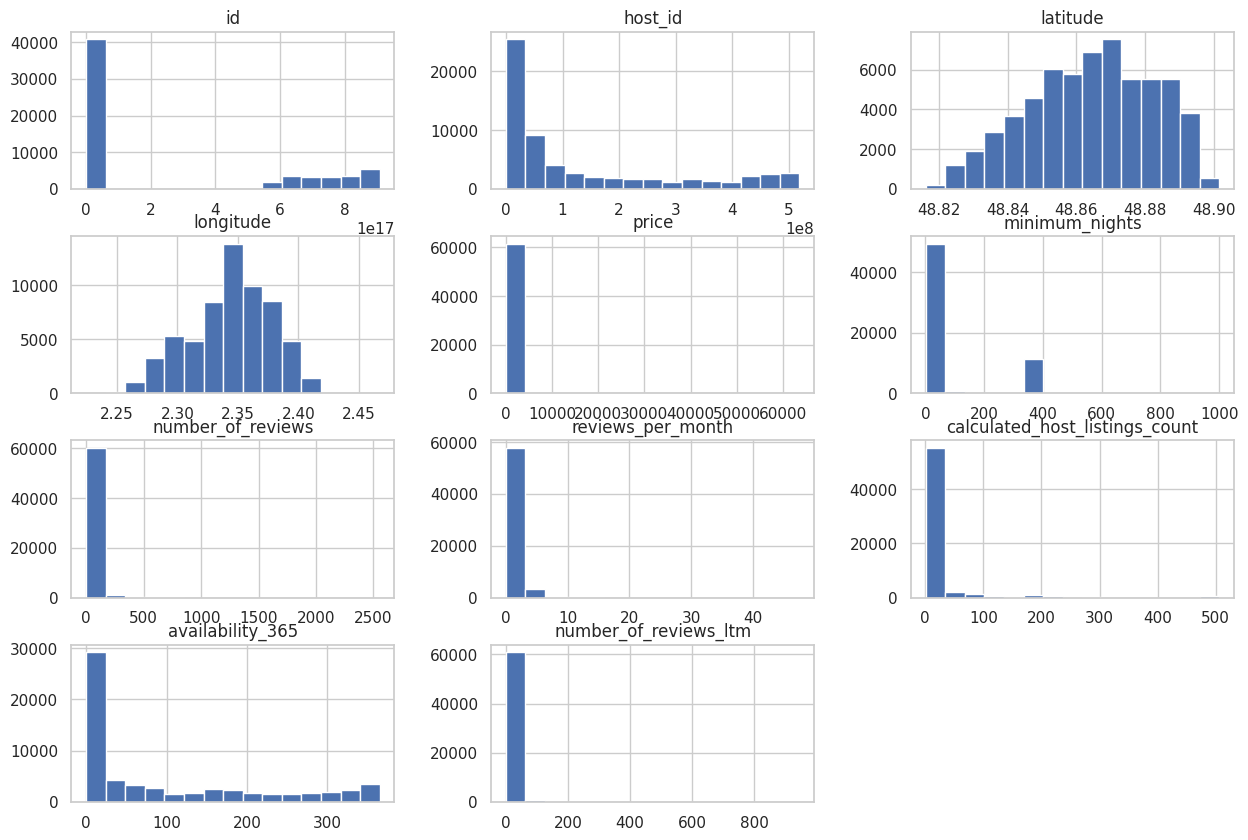

In [35]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Histograma de preços**
Um histograma pode mostrar a distribuição dos preços das acomodações.

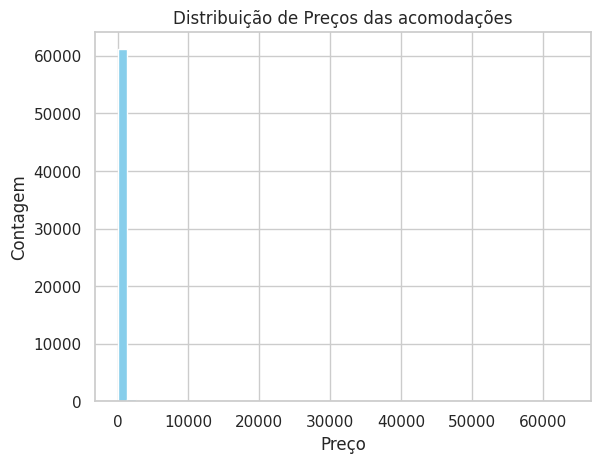

In [36]:
plt.hist(df['price'], bins=50, color='skyblue');
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição de Preços das acomodações')
plt.show()

Podemos ver no gráfico que não foi possivel indentificar com tanta clareza a distribuição dos preços, então logo abaixo vamos plotar outro gráfico para vermos a distribuição dos preços por tipo de quarto.

### **Preços por tipo de quarto**
Um boxplot pode mostrar a distribuição dos preços das acomodações para cada tipo de quarto.

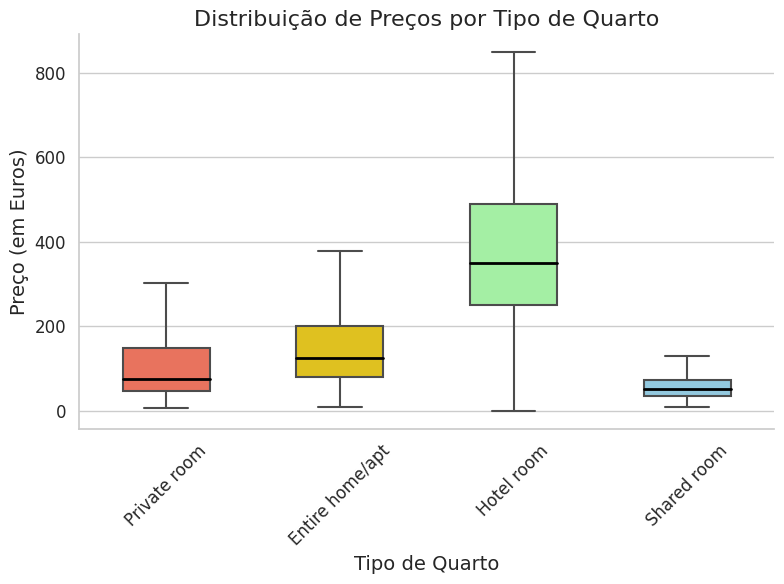

In [37]:

# Defina uma paleta de cores personalizada para o gráfico
colors = ['#FF6347', '#FFD700', '#98FB98', '#87CEEB']

# Crie uma figura e eixo maiores para o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Personalize o estilo de fundo
sns.set_style("whitegrid")

# Crie o gráfico de boxplot com cores personalizadas e uma mediana destacada
sns.boxplot(x='room_type', y='price', data=df, palette=colors, ax=ax, showfliers=False, width=0.5, medianprops={'color': 'black', 'linewidth': 2})

# Personalize os rótulos e o título
ax.set_xlabel('Tipo de Quarto', fontsize=14)
ax.set_ylabel('Preço (em Euros)', fontsize=14)
ax.set_title('Distribuição de Preços por Tipo de Quarto', fontsize=16)

# Ajuste o tamanho dos rótulos nos eixos
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remova a moldura direita e superior do gráfico
sns.despine()

# Mostre o gráfico
plt.tight_layout()
plt.show()


No nosso gráfico acima podemos ver que Hotel room é o que tem mais variações de preços, talvez isso se deva devido a ter imóveis em locais próximos a ponto turisticos e com isso tendo uma maior variação.
Do outro lado vemos que os quartos compartilhado tem um menor variação de preços.

## **Tendências de acomodações por tipo de quarto**
Logo abaixo apresento um gráfico de barras que detalha a distribuição das acomodações disponíveis, segmentadas por diferentes tipos de quarto, assim permitindo-nos entender a preferência dos anfritriões em relação aos diferentes tipos de quartos disponíveis.

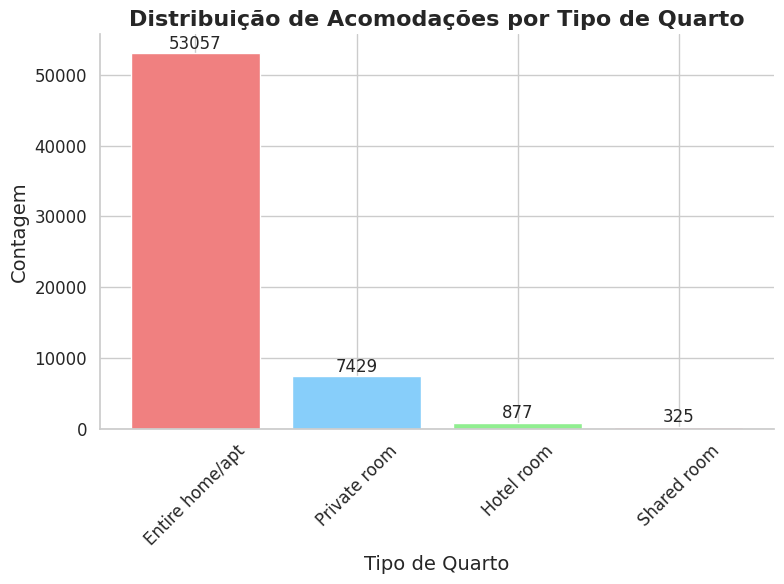

In [38]:

# Dados
room_type_counts = df['room_type'].value_counts()

# Cores personalizadas
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Título e rótulos dos eixos
plt.title('Distribuição de Acomodações por Tipo de Quarto', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Quarto', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Adicionar rótulos de dados acima das barras
for i, count in enumerate(room_type_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=12)

# Estilização adicional
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remover moldura da direita e superior
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()


Como podemos ver no gráfico acima temos uma preferência muito grande de Imóveis do tipo Entire home/apt em relação aos outros tipos, e isso se deve ao fato que neste tipo de acomodação os hospides tem mais privacidade e conforto, no caso de familias ou grupo de amigos. Independência, flexibilidade para realizar tarefas, e com isso devido a procura a oferta deste tipo de imóvel acaba sendo maior.

## **Gráfico de dispersão da latitude e longitude em relação ao Preço**
É possível vermos também um gráfico que mostra a distribuição das localizações dos imóveis em relação ao preço.
Quando mais próximo do vermelho os imóveis são mais caros como vemos abaixo.
Notamos que as localizações onde tem os maiores preços, tem um motivo: próximo aos principais pontos turisticos da cidade, o que faz sentido.

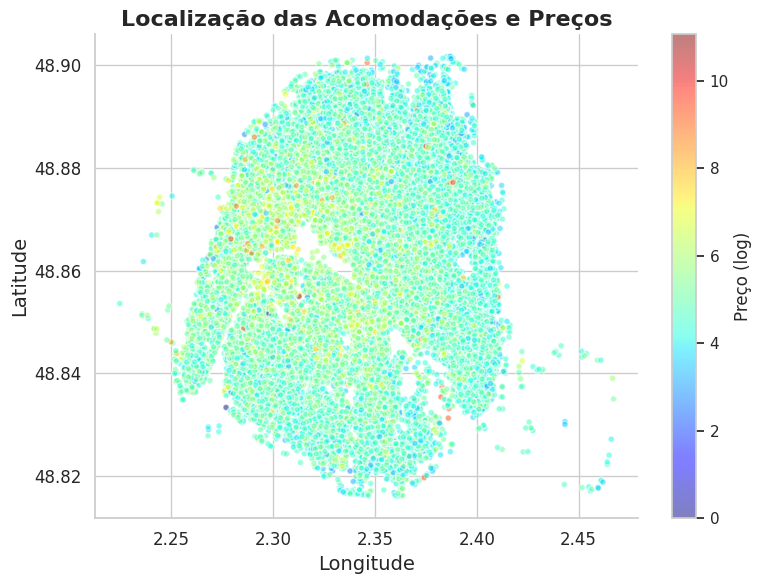

In [39]:

import numpy as np

# Dados
longitude = df['longitude']
latitude = df['latitude']
price = df['price']

# Definir cores com base no preço
colors = np.log1p(price)  # Usar o log para melhorar a escala de cores

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(longitude, latitude, alpha=0.5, c=colors, cmap='jet', edgecolors='w', s=20)

# Título e rótulos dos eixos
plt.title('Localização das Acomodações e Preços', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adicionar barra de cores
cbar = plt.colorbar()
cbar.set_label('Preço (log)', fontsize=12)

# Estilização adicional
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remover moldura da direita e superior
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()


## **

# **lidando com Outliers**
Uma das etapas importantes ao lidar com dados é o tratamento de outliers, que são pontos de dados que se encontram fora dos padrões usuais e têm o potencial de distorcer nossa análise.

Para isso plotei um gráfico do tipo Boxplot para os nossos dados que mostra a quantidade minima de noite que uma pessoa precisa para reservar o imóvel, e para essa análise definimos que acima de 30 dias no nosso caso se torna um outlier por que a maioria das pessoas não alugam uma casa por todo esse tempo, como vemos abaixo temos uma enorme quantidade e também verificamos que temos 12.902 entradas o que representa 20,9% o que é muita coisa.

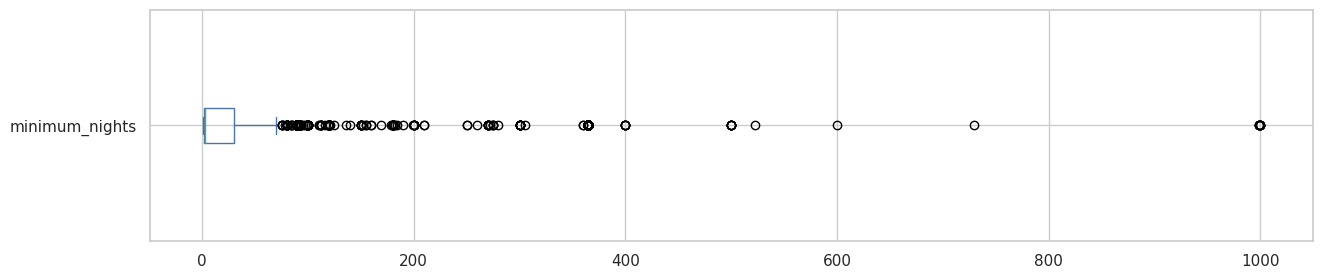

minimum_nights: valores acima de 30:
12902 entradas
20.9149%


In [40]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Vamos fazer o mesmo com os preços, primeiro plotamos o boxplot para verificarmos a presença de outliers e depois verificamos a quantidade de entradas tolerável sem que atrapalhasse a nossa análise. Como vemos 540 entradas no nosso dataset que vamos cortar para não influenciar tanto a análise.

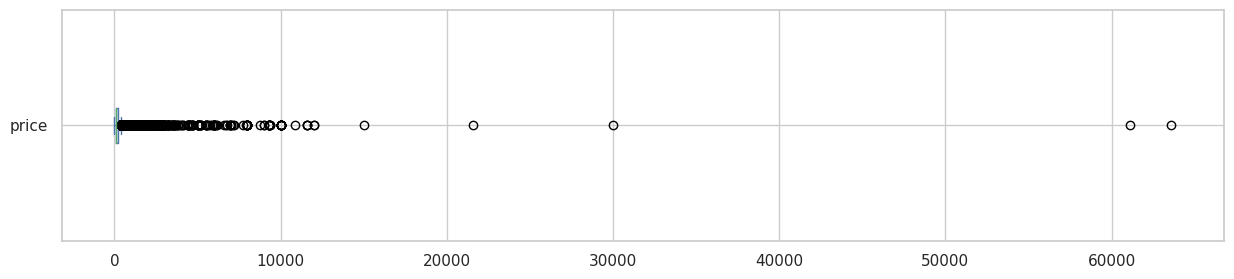


price: valores acima de 1300
540 entradas
0.8754%


In [41]:

# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1300")
print("{} entradas".format(len(df[df.price > 1300])))
print("{:.4f}%".format((len(df[df.price > 1300]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Feito a indentificação dos outliers vamos fazer uma cópia do nosso dataset para manter os nossos dados reais para uma eventual utilização e feito isso podemos eliminar os outliers encontrados.
com isso podemos ver uma melhora na distrição dos dados das duas váriaveis, facilitando a nossa ánalise.

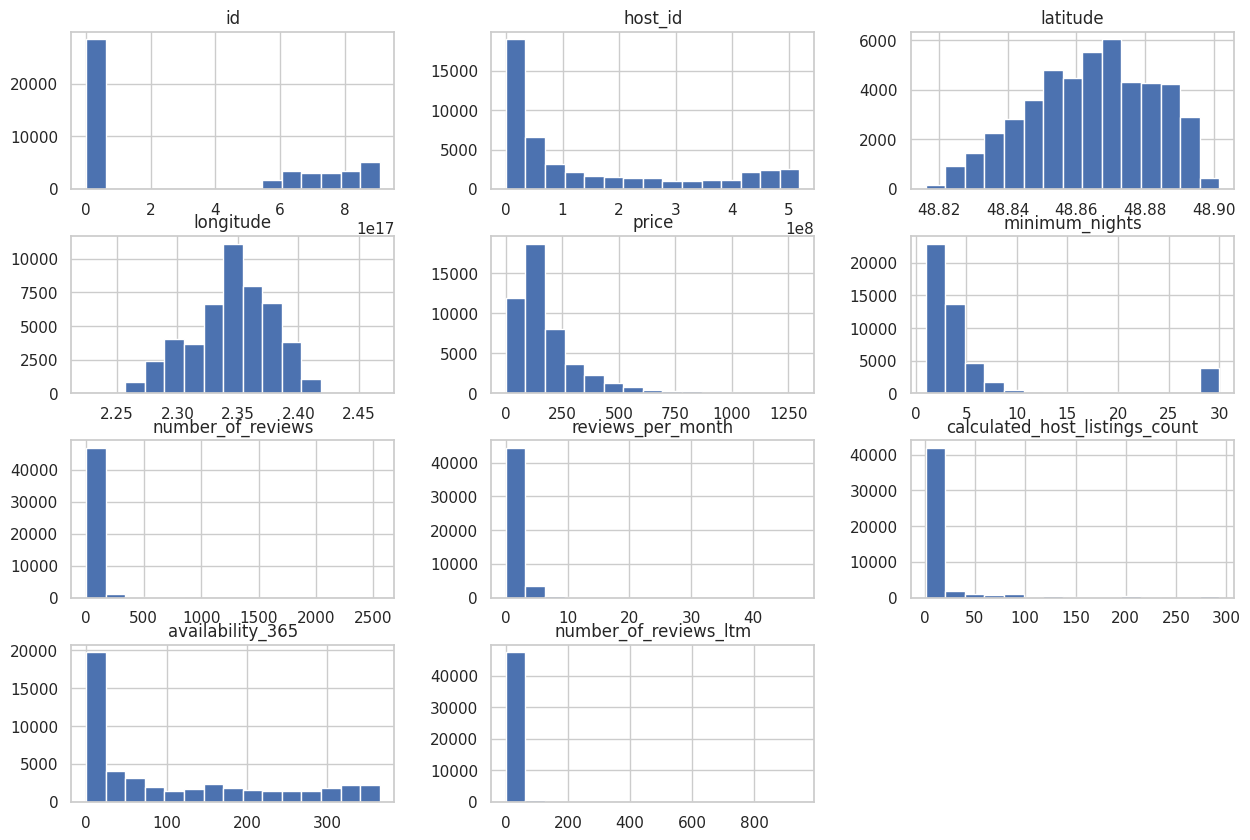

In [42]:
 # remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Após explorarmos a nossas análises e processamento de dados, vamos responder algumas perguntas importantes sobre a cidade de Paris.

### **Qual a média dos alugueis?**

In [43]:
print("A média de preços dos alugueis é: R$ {:,.2f}".format(df_clean.price.mean()))
print("O valor máximo dos alugueis foi : R$ {:,.2f}".format(df_clean.price.max()))

A média de preços dos alugueis é: R$ 188.48
O valor máximo dos alugueis foi : R$ 1,300.00


### **Qual a média dos alugueis por bairros?**

In [44]:
# Agrupe os dados por bairro (neighbourhood) e calcule o preço médio
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Élysée                 325.055231
Louvre                 306.367227
Palais-Bourbon         274.373272
Luxembourg             270.675676
Bourse                 260.760256
Hôtel-de-Ville         250.077617
Temple                 248.003937
Passy                  240.485441
Opéra                  222.158069
Panthéon               217.268129
Vaugirard              177.655443
Batignolles-Monceau    173.744312
Entrepôt               172.348429
Popincourt             154.982321
Observatoire           148.352113
Reuilly                141.526860
Buttes-Montmartre      136.905482
Gobelins               131.246761
Buttes-Chaumont        117.262373
Ménilmontant           111.698336
Name: price, dtype: float64

No gráfico abaixo vamos verificar a média dos alugueis por bairro.

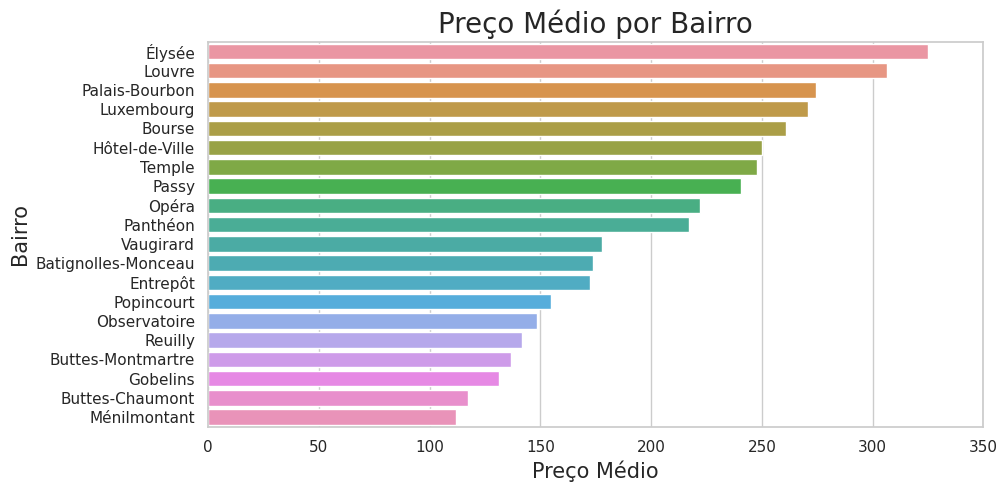

In [45]:


# Agrupe os dados por bairro (neighbourhood) e calcule o preço médio
preco_medio_por_bairro = df_clean.groupby('neighbourhood')['price'].mean().reset_index()

# Ordene os dados pelo preço médio (opcional)
preco_medio_por_bairro = preco_medio_por_bairro.sort_values(by='price', ascending=False)

# Crie um gráfico de barras
plt.figure(figsize=(10, 5))
sns.set_palette('coolwarm')  # Escolha uma paleta de cores
ax = sns.barplot(x='price', y='neighbourhood', data=preco_medio_por_bairro)
plt.title('Preço Médio por Bairro', fontsize=20)
plt.xlabel('Preço Médio', fontsize=15)
plt.ylabel('Bairro', fontsize=15)
plt.xticks(rotation=90)  # Rotaciona os rótulos dos bairros para melhor legibilidade
# Gire os rótulos do eixo x para a horizontal e alinhe-os
ax.set_xticks(ax.get_xticks())  # Use as mesmas posições dos ticks atuais
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

plt.show();



No gráfico acima podemos ver o preço médio dos aluguéis por bairro, com isso percebemos que Élysée e Louvre são os bairros que tem a maior média de preços.


E faz total sentido eles estarem entre os bairros mais caros, pois estão localizados no coração de Paris, próximos a importantes pontos turísticos, como a Torre Eiffel, o museu do louvre e a Champs-Élysées.

### **Qual o preço médio por quarto/imóvel?**

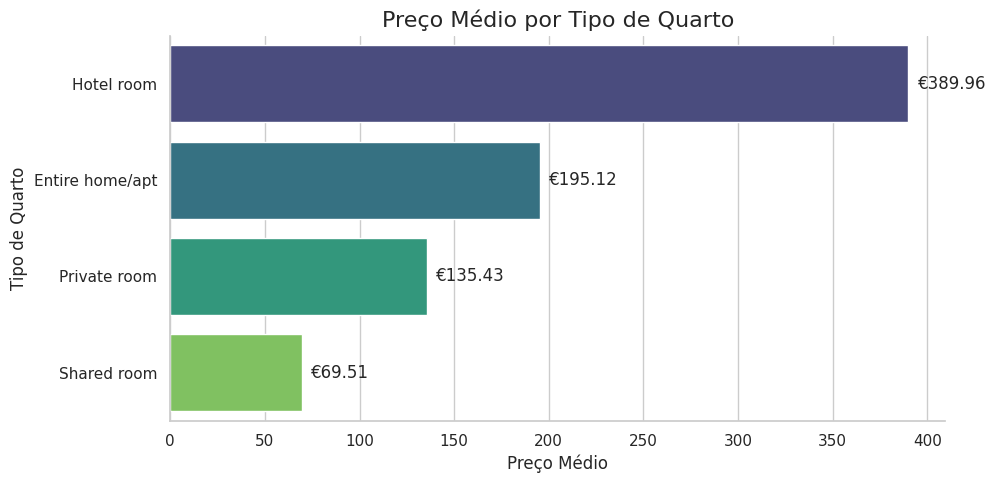

In [46]:

# Agrupe os dados por quarto (room_type) e calcule o preço médio
preco_medio_por_quarto = df_clean.groupby('room_type')['price'].mean().reset_index()

# Ordene os dados pelo preço médio (do maior para o menor)
preco_medio_por_quarto = preco_medio_por_quarto.sort_values(by='price', ascending=False)

# Crie um gráfico de barras com cores personalizadas
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(preco_medio_por_quarto))  # Escolha uma paleta de cores
ax = sns.barplot(x='price', y='room_type', data=preco_medio_por_quarto, palette=colors)

# Adicione rótulos e título
plt.title('Preço Médio por Tipo de Quarto', fontsize=16)
plt.xlabel('Preço Médio', fontsize=12)
plt.ylabel('Tipo de Quarto', fontsize=12)

# Adicione valores nas barras com formatação
for i, v in enumerate(preco_medio_por_quarto['price']):
    plt.text(v + 5, i, f'€{v:.2f}', va='center', fontsize=12)

# Remova as bordas direita e superior
sns.despine()

plt.show()


No gráfico acima podemos ver de forma clara os preços médios por tipo de imóvel, Hotel room é claramente o mais caro devido a oferta de serviçoes personalizados que o cliente pode receber, em seguida Entire home/apt(Apartamento/ casa inteira) tende a ser mais caras por que oferecem maior privacidade e espaço para os hóspedes.

### **Qual a correlação existente entre as variáveis**

Primeiro vamos plotar uma matriz de correlação para tentar indentificar algum padrão

In [47]:

# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.146069,0.007942,0.065102,0.161291,0.272904
minimum_nights,-0.146069,1.000000,-0.097964,-0.171548,0.126942,0.150308
number_of_reviews,0.007942,-0.097964,1.000000,0.505906,-0.040133,0.065846
reviews_per_month,0.065102,-0.171548,0.505906,1.000000,0.033883,0.188179
calculated_host_listings_count,0.161291,0.126942,-0.040133,0.033883,1.000000,0.121292
availability_365,0.272904,0.150308,0.065846,0.188179,0.121292,1.000000


E agora um gráfico que mostra se existe alguma correlação entre as nossas váriaveis.

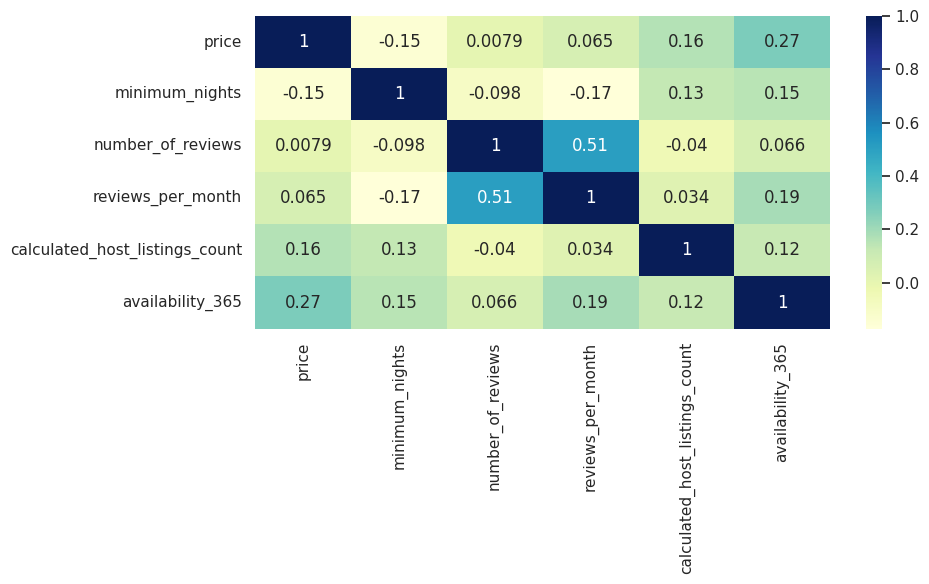

In [48]:
# heatmap (mapa de calor)
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, ax=ax, annot=True, cmap='YlGnBu')
plt.tight_layout();

Vemos que uma correlação de 0.27 entre Price(preços) e availability_365(disponibilidade no ano), mesmo que não seja tão forte indica que, em média, propiedades com mais disponivilidade ao longo do aon tendem a ter preços ligeiramente mais baixos. Ou seja isso sugere que a disponibilidade de uma propriedade pode influenciar no seu preço, mesmo que uma extensão modesta.

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Já vimos no inicio da nossa análise a tendencias dos imoveis mais alugados atráves de um gráfico, mas abaixo vamos verificar a porcentagem de imóveis disponivel.

In [49]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    39898
Private room        7278
Hotel room           791
Shared room          319
Name: room_type, dtype: int64

In [50]:
# mostrar a porcentagem de cada tipo de imóvel disponível
porcentagem_tipo_quarto = df_clean.room_type.value_counts() / df_clean.shape[0] * 100
print(porcentagem_tipo_quarto)



Entire home/apt    82.628505
Private room       15.072692
Hotel room          1.638156
Shared room         0.660647
Name: room_type, dtype: float64


### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [51]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

5.258812078035041

### **Qual a média de preços por minimo de noites?**

Quando uma pessoa vai alugar um Airbnb é possível escolher a quantidade de dias deseja, e abaixo vamos verificar como isso influencia nos preços de acordo com a faixa de dias escolhidos.

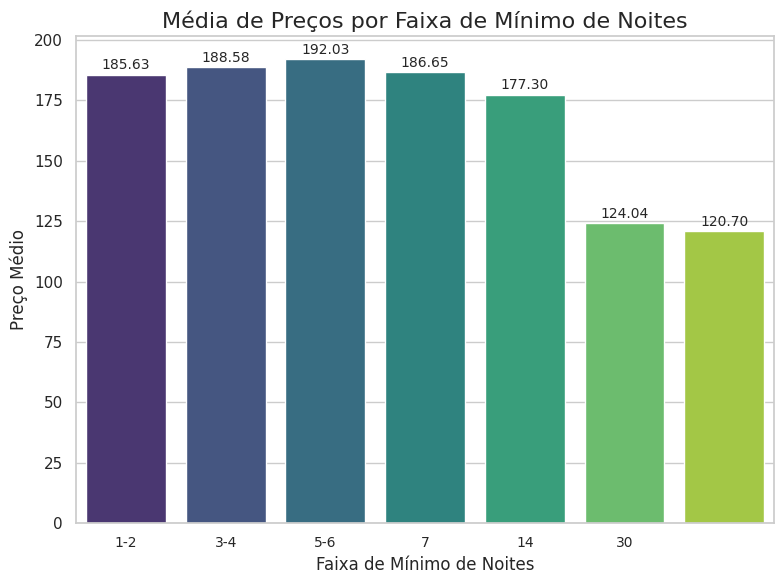

In [52]:

# Defina as faixas de mínimo de noites que deseja analisar
faixas_minimo_noites = [1, 2, 3, 4, 5, 7, 14, 30]

# Crie uma coluna 'Faixa_Minimo_Noites' para categorizar as propriedades com base no mínimo de noites
df_clean['Faixa_Minimo_Noites'] = pd.cut(df_clean['minimum_nights'], bins=faixas_minimo_noites)

# Calcule a média de preços para cada faixa de mínimo de noites
media_preco_por_faixa = df_clean.groupby('Faixa_Minimo_Noites')['price'].mean()

# Crie um gráfico de barras atraente com Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=media_preco_por_faixa.index, y=media_preco_por_faixa, palette="viridis")

# Adicione um título informativo
plt.title('Média de Preços por Faixa de Mínimo de Noites', fontsize=16)

# Rótulos dos eixos
plt.xlabel('Faixa de Mínimo de Noites', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)

# Rótulos personalizados para o eixo x (Faixas de Noites)
faixas_formatadas = ['1-2', '3-4', '5-6', '7', '14', '30']
plt.xticks(range(len(faixas_formatadas)), faixas_formatadas, fontsize=10)

# Adicione rótulos com valores nas barras
for i, v in enumerate(media_preco_por_faixa):
    plt.text(i, v + 1, f'{v:.2f}', fontsize=10, ha='center', va='bottom')


# Mostre o gráfico
plt.tight_layout()
plt.show()


Analisando o gráfico é possível perceber que quando uma pessoa aluga entre 1 e 7 dias os preços não variam tanto, porém quando escolhe entre 14 e 30 os preços caem bastante, ou seja quanto mais tempo alugar mais barato será a média de preços por dia.

## **Gráfico de barras para visualização das Avaliações por Mês**






Será que quanto mais um bairro recebe avaliações ele tende a ter mais procura ou o ter alterações no seu preço?

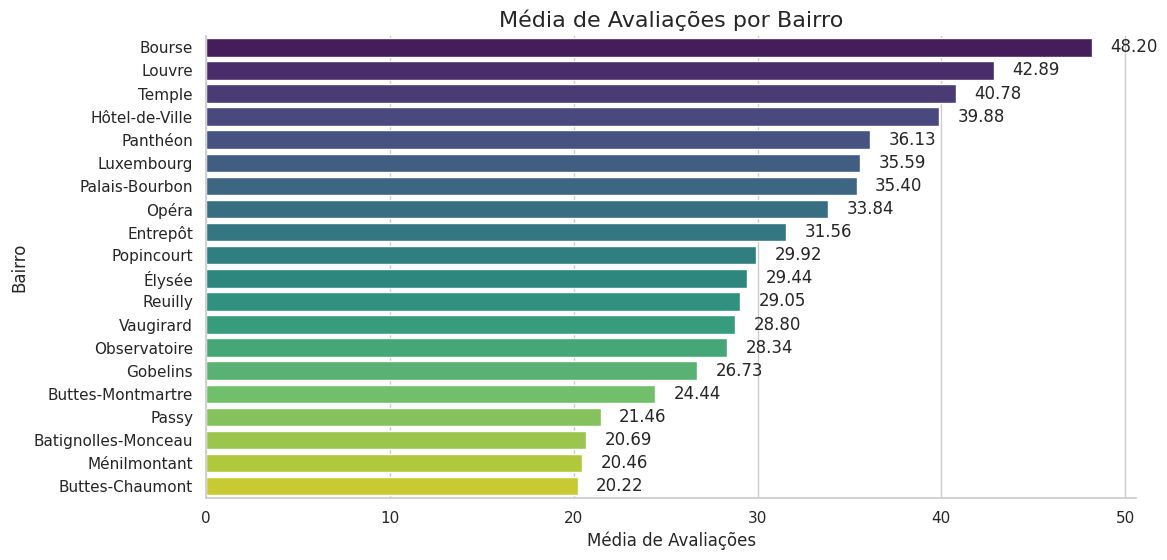

In [53]:

# Calcule a média de avaliações por bairro
media_avaliacoes_por_bairro = df_clean.groupby('neighbourhood')['number_of_reviews'].mean().reset_index()

# Ordene os bairros pela média de avaliações (do maior para o menor)
media_avaliacoes_por_bairro = media_avaliacoes_por_bairro.sort_values(by='number_of_reviews', ascending=False)

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='number_of_reviews', y='neighbourhood', data=media_avaliacoes_por_bairro, palette='viridis')

# Adicione rótulos e título
plt.title('Média de Avaliações por Bairro', fontsize=16)
plt.xlabel('Média de Avaliações', fontsize=12)
plt.ylabel('Bairro', fontsize=12)

# Adicione valores nas barras com formatação
for i, v in enumerate(media_avaliacoes_por_bairro['number_of_reviews']):
    plt.text(v + 1, i, f'{v:.2f}', va='center', fontsize=12)

# Remova as bordas direita e superior
sns.despine()

plt.show()


Podemos perceber pelo gráfico acima uma certa relação entre o número médio de avaliações e o preço, os bairros mais bem avaliados fazem com que os proprietarios aumentem os preços dos aluguéis devido a sua procura.

# **Conclusão**

Nesta análise de dados exploratória, mergulhamos profundamente nas informações disponíveis sobre aluguéis de imóveis em Paris, fornecidas pelo Airbnb. Com base em uma série de perguntas e objetivos definidos no início deste projeto, conseguimos extrair valiosos insights sobre o mercado de hospedagem na cidade. Abaixo, destacamos os principais resultados e conclusões alcançados:

## 1. Preços Médios e Tipos de Acomodação:
- A média de preços para aluguéis em Paris é de aproximadamente €188,48 (equivalente a R$978,21 na taxa de câmbio atual), tornando-a uma cidade com preços razoavelmente elevados para hospedagem.
- A maioria dos hóspedes opta por alugar acomodações do tipo "Entire home/apt" (82,63%), seguido por "Private room" (15,07%). Acomodações do tipo "Hotel room" e "Shared room" são menos comuns.

## 2. Duração Média da Estadia:
- A duração média da estadia em um imóvel alugado em Paris é de aproximadamente 4 noites. Isso sugere que a maioria dos hóspedes opta por estadias de curto prazo.

## 3. Bairros Mais Caros e Mais Baratos:
- Bairros como Élysée, Louvre e Luxembourg são os mais caros para hospedagem, com diárias médias superiores a €300.
- Por outro lado, bairros como Ménilmontant, Buttes-Chaumont e Buttes-Montmartre oferecem acomodações mais econômicas, com diárias médias inferiores a €130.

## 4. Análise de Preços por Tipo de Quarto:
- A análise dos preços médios por tipo de quarto revelou que acomodações do tipo "Hotel room" tendem a ser as mais caras, com uma média de €389. "Entire home/apt" também é relativamente caro, com uma média de €195. "Private room" tem uma média intermediária de €135, enquanto "Shared room" é a opção mais econômica, com uma média de €69.

## 5. Mapa de Calor dos Preços:
- O mapa de calor dos preços dos imóveis mostrou que as regiões próximas ao Arco do Triunfo, Torre Eiffel e Palácio dos Inválidos são as mais caras para hospedagem em Paris.

Em resumo, esta análise proporcionou uma visão detalhada do mercado de aluguéis de imóveis em Paris, incluindo preços médios, tipos de acomodação preferidos, duração média das estadias e bairros mais caros e econômicos. Essas informações podem ser extremamente úteis para viajantes que desejam planejar sua estadia na cidade e para anfitriões que buscam insights sobre o mercado. Além disso, os resultados podem servir como ponto de partida para análises mais avançadas, como modelos de previsão de preços ou recomendações personalizadas.

Este é apenas o começo, e há muitas oportunidades para expandir essa análise e obter um entendimento ainda mais profundo do mercado de hospedagem em Paris. Esperamos que este relatório seja útil e inspire futuras investigações sobre o assunto.
